In [55]:
import pandas as pd
import numpy as np
import dash
from dash import Dash
import seaborn as sns
from dash import html
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer

# Read Data

In [56]:
df = pd.read_csv('/Users/vishal/Desktop/Way to New World/University/01_All_Semesters/02_Semester/01_Visualization of Complex Data/05_Projects/Patient-Survival-Prediction---Dash-Visualization/dataset/Dataset.csv')

In [57]:
round(df.isna().sum().sort_values(ascending=False)/len(df) * 100,2)


h1_bilirubin_min         92.27
h1_bilirubin_max         92.27
h1_lactate_max           91.99
h1_lactate_min           91.99
h1_albumin_max           91.40
                         ...  
icu_type                  0.00
pre_icu_los_days          0.00
readmission_status        0.00
apache_post_operative     0.00
encounter_id              0.00
Length: 186, dtype: float64

<Axes: xlabel='age'>

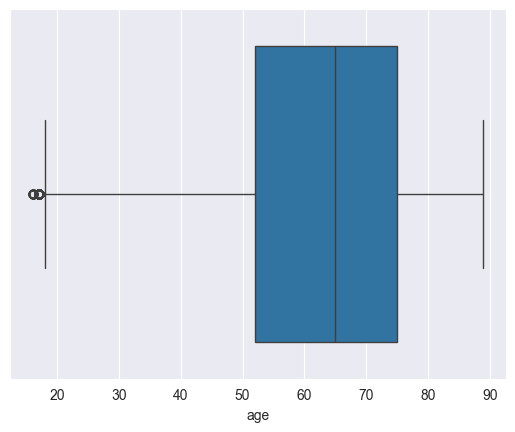

In [58]:
sns.boxplot(df, x='age')

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91713 entries, 0 to 91712
Columns: 186 entries, encounter_id to apache_2_bodysystem
dtypes: float64(170), int64(8), object(8)
memory usage: 130.1+ MB


In [43]:
df.describe()

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,91713.000000,91713.000000,91713.000000,91713.000000,87485.000000,88284.000000,91713.000000,90379.000000,91713.000000,91713.000000,...,83766.000000,83766.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000,90998.000000
mean,65606.079280,65537.131464,105.669262,0.086302,62.309516,29.185818,0.183736,169.641588,508.357692,0.835766,...,0.086787,0.043955,0.000857,0.015693,0.225192,0.012989,0.026165,0.007066,0.004132,0.020638
std,37795.088538,37811.252183,62.854406,0.280811,16.775119,8.275142,0.387271,10.795378,228.989661,2.487756,...,0.247569,0.217341,0.029265,0.124284,0.417711,0.113229,0.159628,0.083763,0.064148,0.142169
min,1.000000,1.000000,2.000000,0.000000,16.000000,14.844926,0.000000,137.200000,82.000000,-24.947222,...,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32852.000000,32830.000000,47.000000,0.000000,52.000000,23.641975,0.000000,162.500000,369.000000,0.035417,...,0.020000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,65665.000000,65413.000000,109.000000,0.000000,65.000000,27.654655,0.000000,170.100000,504.000000,0.138889,...,0.050000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,98342.000000,98298.000000,161.000000,0.000000,75.000000,32.930206,0.000000,177.800000,679.000000,0.409028,...,0.130000,0.060000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,131051.000000,131051.000000,204.000000,1.000000,89.000000,67.814990,1.000000,195.590000,927.000000,159.090972,...,0.990000,0.970000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [44]:
fig = px.pie(df, values='hospital_death', names ='gender',title='Patient death according to gender')
fig.show()

In [45]:
df[df['age'] > 100]

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,ethnicity,gender,height,...,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis,apache_3j_bodysystem,apache_2_bodysystem


In [46]:
columns = df.columns.tolist()
columns

['encounter_id',
 'patient_id',
 'hospital_id',
 'hospital_death',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_m

<Axes: xlabel='age', ylabel='Count'>

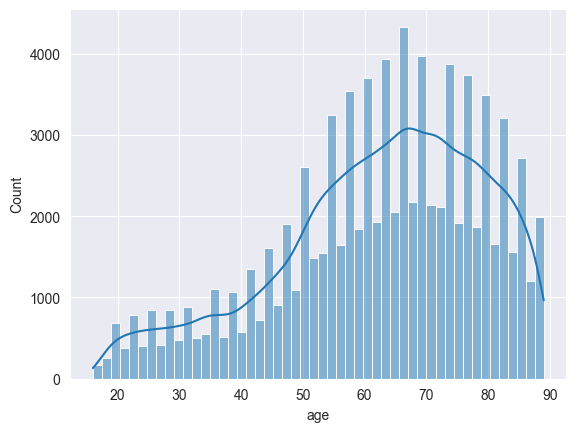

In [47]:
sns.histplot(df['age'], bins=50, kde=True)

# Notes 

paco2_apache
paco2_for_ph_apache
pao2_apache
ph_apache

All these varaibles are only performed if there is any gas flow in the artary. 

In [48]:
def vishal():
    pass

In [50]:
#Vishal

In [58]:
df['h1_albumin_max'].max()

4.7

In [59]:
df['h1_albumin_max'].min()


1.1

/var/folders/by/j9csnfcn3c30bpt40jz1c2qw0000gn/T/ipykernel_1256/2375103679.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/by/j9csnfcn3c30bpt40jz1c2qw0000gn/T/ipykernel_1256/2375103679.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/by/j9csnfcn3c30bpt40jz1c2qw0000gn/T/ipykernel_1256/2375103679.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/by/j9csnfcn3c30bpt40jz1c2qw0000gn/T/ipykernel_1256/2375103679.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.

/var/folders/by/j9csnfcn3c30bpt40jz1c2qw0000gn/T/ipykernel_1256/2375103679.py:9: UserWarning:

set_ticklabels() should only be used with a fixed number of t

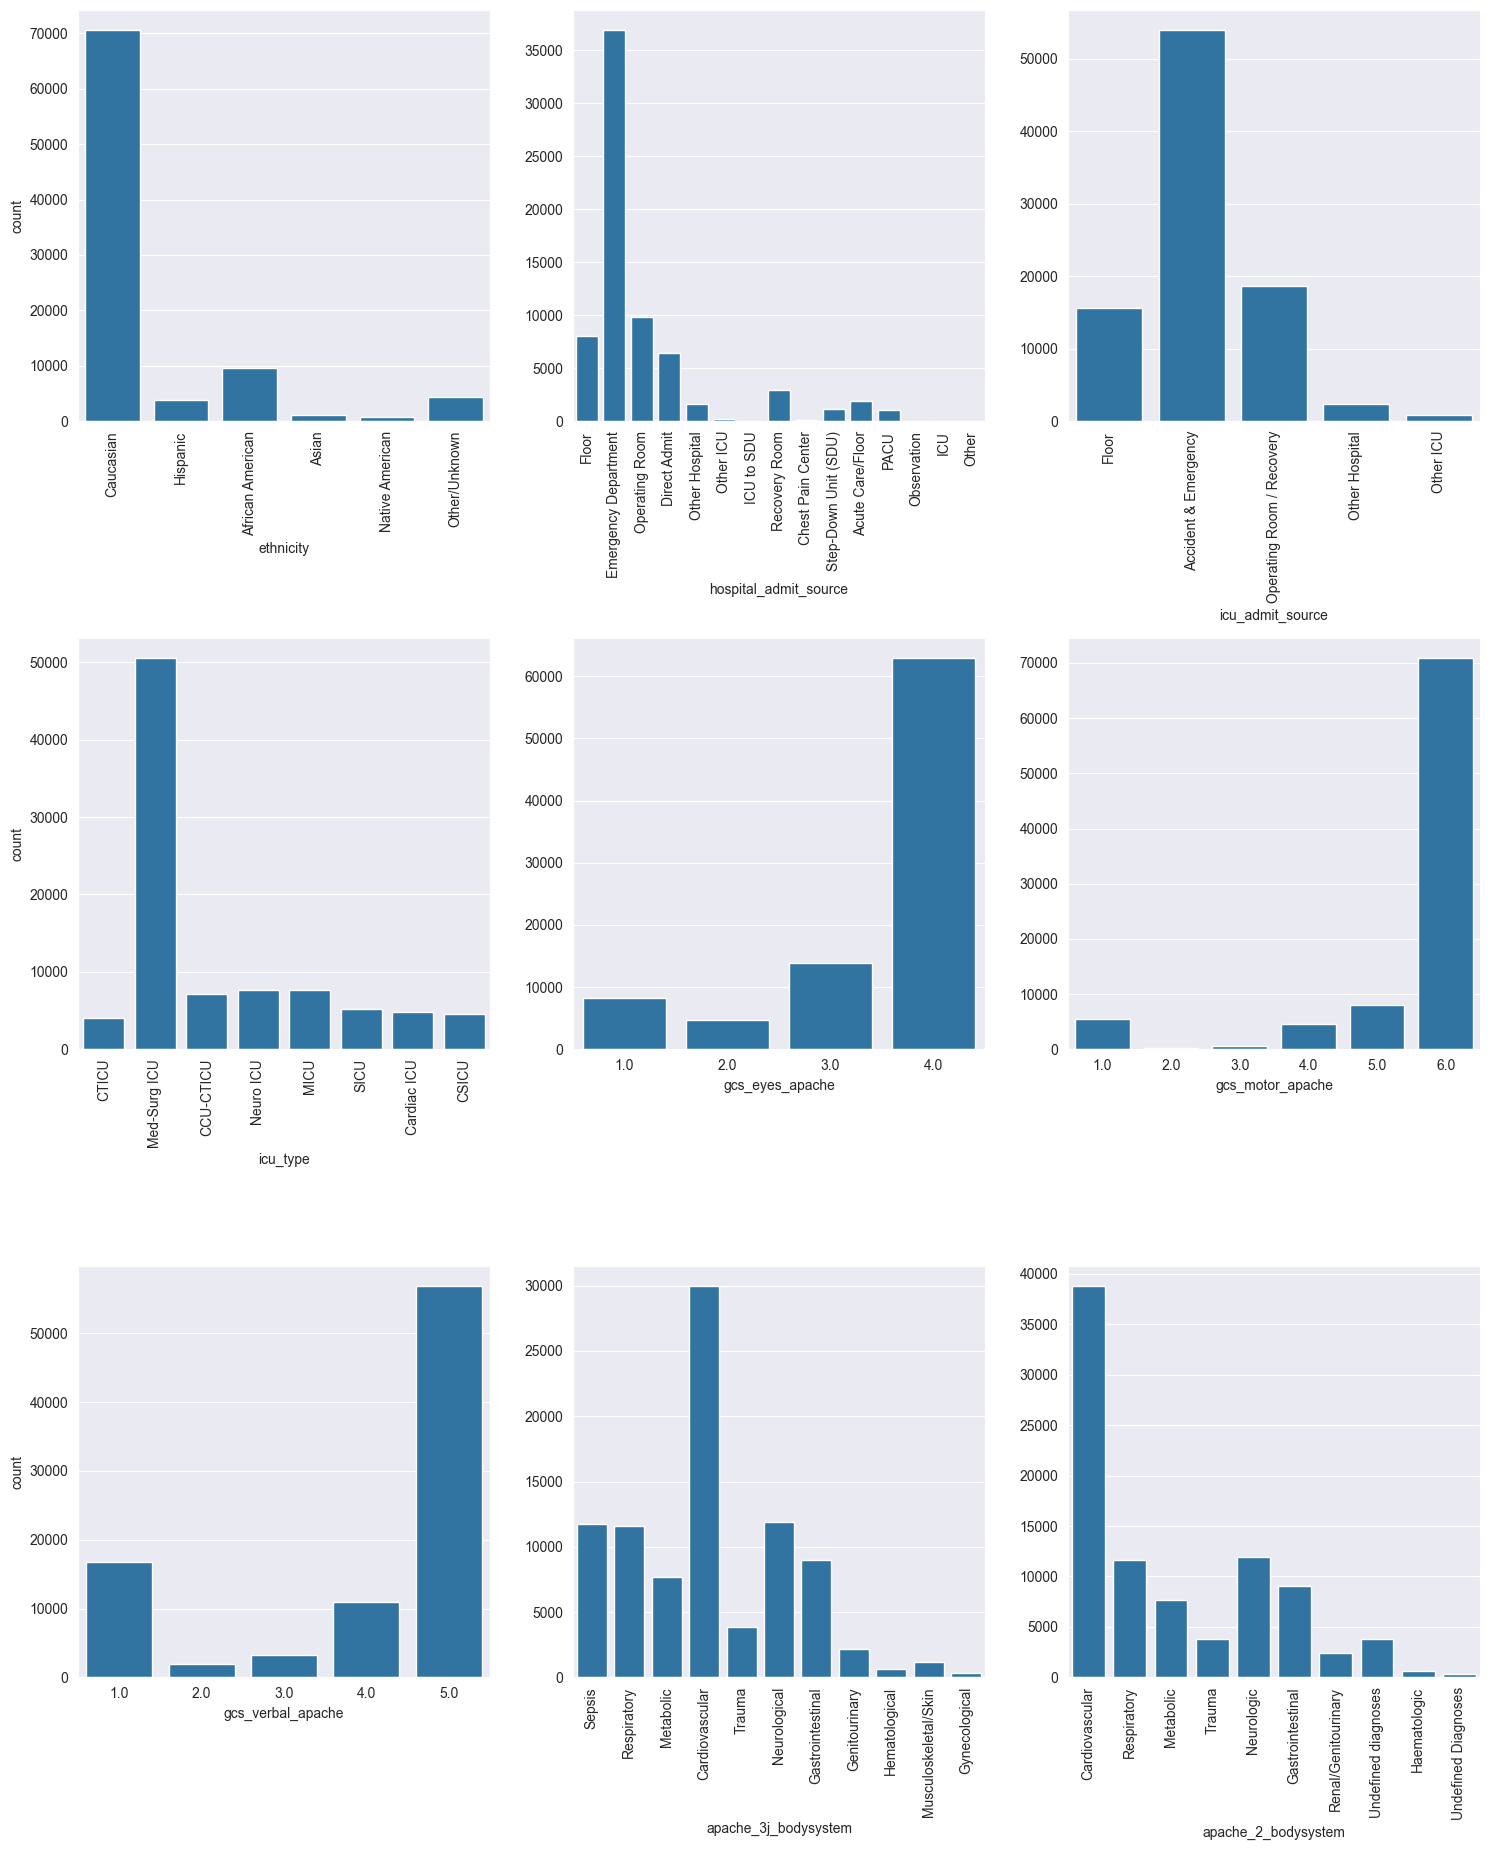

In [61]:
import math
cols_selected = [col for col in df.columns if 3 < df[col].nunique() <= 15]
col_vert = ['ethnicity', 'hospital_admit_source', 'icu_admit_source', 'icu_type', 'apache_3j_bodysystem', 'apache_2_bodysystem']
nrows = math.ceil(len(cols_selected)/3)
fig, ax = plt.subplots(nrows, 3, figsize = (15, 6.2 * nrows), sharey = False)
for i in range(len(cols_selected)):
    countplot = sns.countplot(data = df, x = cols_selected[i], ax = ax[i//3, i%3])
    if cols_selected[i] in col_vert:
        countplot.set_xticklabels(countplot.get_xticklabels(), rotation = 90)
    if i%3 != 0:
        ax[i//3, i%3].set_ylabel(" ")
plt.tight_layout()
plt.show()

In [75]:
ethnicity_apache = df.groupby('ethnicity')['apache_4a_icu_death_prob'].mean()
ethnicity_apache

ethnicity
African American    0.047730
Asian               0.047519
Caucasian           0.042758
Hispanic            0.048505
Native American     0.070449
Other/Unknown       0.054991
Name: apache_4a_icu_death_prob, dtype: float64

In [78]:
ethnicity_apache_gender = df.groupby(['ethnicity', 'gender'])['apache_4a_icu_death_prob'].mean().reset_index()
print(ethnicity_apache_gender)

           ethnicity gender  apache_4a_icu_death_prob
0   African American      F                  0.053290
1   African American      M                  0.042388
2              Asian      F                  0.046875
3              Asian      M                  0.048067
4          Caucasian      F                  0.044304
5          Caucasian      M                  0.041473
6           Hispanic      F                  0.052438
7           Hispanic      M                  0.044962
8    Native American      F                  0.065621
9    Native American      M                  0.074942
10     Other/Unknown      F                  0.047430
11     Other/Unknown      M                  0.057893


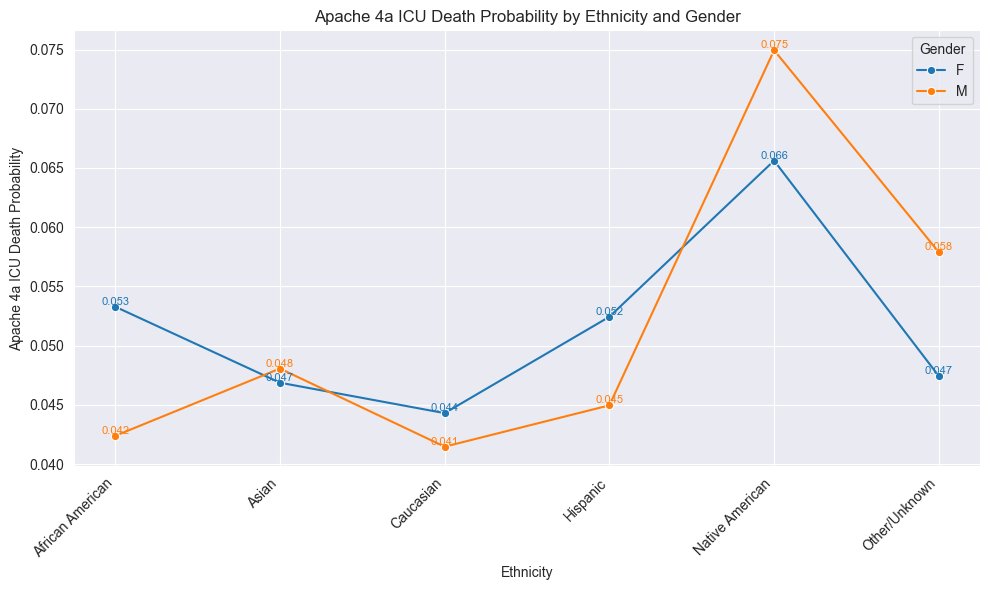

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the line plot
plt.figure(figsize=(10, 6))
plot = sns.lineplot(data=ethnicity_apache_gender, x='ethnicity', y='apache_4a_icu_death_prob', hue='gender', marker='o')

# Add text annotations for each data point
for line in plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y, f'{y:.3f}', color=line.get_color(), ha='center', va='bottom', fontsize=8)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Set plot labels and title
plt.xlabel('Ethnicity')
plt.ylabel('Apache 4a ICU Death Probability')
plt.title('Apache 4a ICU Death Probability by Ethnicity and Gender')

# Show plot
plt.tight_layout()
plt.legend(title='Gender')
plt.show()


In [6]:
imputer = IterativeImputer(max_iter=10, random_state=0)


In [20]:
# imputed_values = imputer.fit_transform(df_copy)
for cols in df.columns:
    if df[cols].dtype == 'object':
        print(f'{cols}:{df[cols].isna().sum()}: Mode: {df[cols].mode()}')

ethnicity:0: Mode: 0    Caucasian
Name: ethnicity, dtype: object
gender:0: Mode: 0    M
Name: gender, dtype: object
hospital_admit_source:0: Mode: 0    Emergency Department
Name: hospital_admit_source, dtype: object
icu_admit_source:0: Mode: 0    Accident & Emergency
Name: icu_admit_source, dtype: object
icu_stay_type:0: Mode: 0    admit
Name: icu_stay_type, dtype: object
icu_type:0: Mode: 0    Med-Surg ICU
Name: icu_type, dtype: object
apache_3j_bodysystem:0: Mode: 0    Cardiovascular
Name: apache_3j_bodysystem, dtype: object
apache_2_bodysystem:0: Mode: 0    Cardiovascular
Name: apache_2_bodysystem, dtype: object


In [19]:
Categorical = []
for cols in df.columns:
    if df[cols].dtype == 'object':
        Categorical.append(cols)
imputer = SimpleImputer(strategy='most_frequent')
for column in Categorical:
    df[column] = imputer.fit_transform(df[column].values.reshape(-1, 1)).flatten()



In [25]:
Categorical.append('')

['ethnicity',
 'gender',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_stay_type',
 'icu_type',
 'apache_3j_bodysystem',
 'apache_2_bodysystem']

In [32]:
Categorical_copy = pd.DataFrame()
for cols in Categorical:
    Categorical_copy[cols] = df[cols]
    df = df.drop([cols],axis=1)

In [33]:
df

,encounter_id,patient_id,hospital_id,hospital_death,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,...,apache_4a_hospital_death_prob,apache_4a_icu_death_prob,aids,cirrhosis,diabetes_mellitus,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
0,66154,25312,118,0,68.0,22.730000,0,180.3,92,0.541667,...,0.10,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,114252,59342,81,0,77.0,27.420000,0,160.0,90,0.927778,...,0.47,0.29,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,119783,50777,118,0,25.0,31.950000,0,172.7,93,0.000694,...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,79267,46918,118,0,81.0,22.640000,1,165.1,92,0.000694,...,0.04,0.03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,92056,34377,33,0,19.0,NaN,0,188.0,91,0.073611,...,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91708,91592,78108,30,0,75.0,23.060250,0,177.8,927,0.298611,...,0.12,0.05,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
91709,66119,13486,121,0,56.0,47.179671,0,183.0,925,0.120139,...,0.03,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
91710,8981,58179,195,0,48.0,27.236914,0,170.2,908,0.046528,...,0.05,0.02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
91711,33776,120598,66,0,NaN,23.297481,0,154.9,922,0.081944,...,0.07,0.02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Multivariate Imputation by Chain Mechanism

In [37]:
# Assuming you have a DataFrame df
df_copy = df.copy()


# Create a mask of missing values
missing_mask = df_copy.isna()

# Initialize an IterativeImputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit the imputer and transform the data
imputed_values = imputer.fit_transform(df_copy)

# Convert the imputed values array back to a DataFrame
imputed_df = pd.DataFrame(imputed_values, columns=df_copy.columns, index=df_copy.index)

# Assign the imputed values to the missing values in df_copy
df_copy[missing_mask] = imputed_df[missing_mask]

/Users/vishal/anaconda3/envs/DM/lib/python3.11/site-packages/sklearn/impute/_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [40]:
df_copy.isna().sum()

encounter_id                   0
patient_id                     0
hospital_id                    0
hospital_death                 0
age                            0
                              ..
hepatic_failure                0
immunosuppression              0
leukemia                       0
lymphoma                       0
solid_tumor_with_metastasis    0
Length: 178, dtype: int64

(0.0, 100.0)

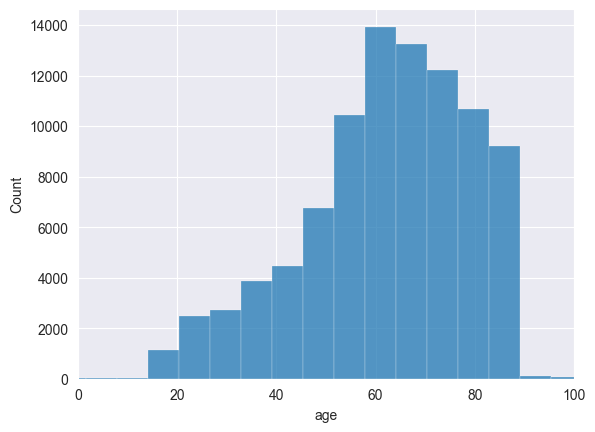

In [44]:
sns.histplot(df_copy, x='age',bins=200
             )
plt.xlim(0,100)

In [48]:
df_copy['age'].unique().max()

639.0015935537283

{'whiskers': [<matplotlib.lines.Line2D at 0x1659c0790>,
 'caps': [<matplotlib.lines.Line2D at 0x1659c1a50>,
 'boxes': [<matplotlib.lines.Line2D at 0x1659c0050>],
 'medians': [<matplotlib.lines.Line2D at 0x1659c2750>],
 'fliers': [<matplotlib.lines.Line2D at 0x1659c3050>],
 'means': []}

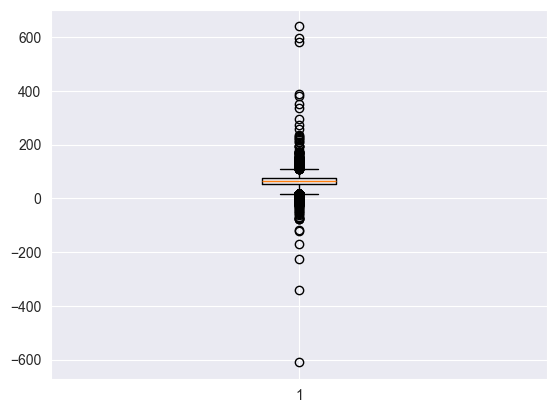

In [52]:
plt.boxplot(df_copy['age'])